## Keras learn

#### 這個範例碼主要是利用Mnist dataset學習Keras,
#### 並且在模型訓練完畢後, 還額外載入作者手寫數字的資料進行測驗

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pydot #用於繪製Keras模型

In [2]:
# load minst dataset
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
# rescale gary value
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# setting optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# training
history = model.fit(x_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=0, shuffle=True)

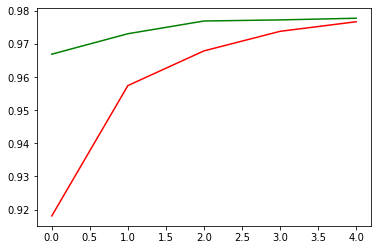

In [7]:
# 對訓練過程的準確度繪圖
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

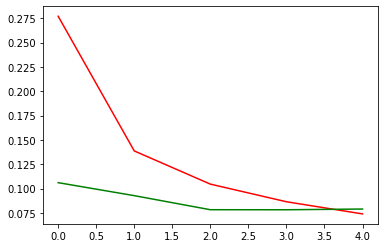

In [8]:
# 對訓練過程的損失函數繪圖
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [9]:
# 模型評估，打分數
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0792 - accuracy: 0.9779


[0.0791764964128728, 0.9779]

In [27]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
# pip install pydot
gPath = os.path.join(os.getcwd(), 'minst_model.png')
print(gPath)
tf.keras.utils.plot_model(model, to_file = gPath)

d:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\Pycode\minst_model.png
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [29]:
# 如果你對此訓練結果滿意, 可以儲存
mPath = os.path.join(os.getcwd(), 'minst_model.h5')
print(mPath)
action = 'n' # r or w

if(action == 'w'):
    # 模型存檔
    model.save(mPath)
    print('save done')
elif(action == 'r'):
    # 模型載入
    model = tf.keras.models.load_model(mPath)
    print('read done')

d:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\Pycode\minst_model.h5
save done


In [30]:
# 實際測量
predictions = model.predict_classes(x_test)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import skimage.io as skio
from skimage.color import rgb2gray
from numpy import newaxis

In [32]:
workspace = 'D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken'
FNs = os.listdir(workspace)

In [33]:
ken_ans = np.zeros(len(FNs), dtype=int)
n=0
for FN in FNs:
    Fpath=os.path.join(workspace, FN)
    Fdata = rgb2gray(skio.imread(Fpath))[newaxis, :, :]
    if(n==0):
        ken_data = Fdata
    else:
        dim = ken_data.shape
        ken_data = np.append(ken_data, Fdata)
        ken_data = ken_data.reshape(dim[0]+1, dim[1], dim[2])

    ken_ans[n]=n
    n+=1
    print(Fpath)
    
print(ken_ans)
print(ken_data.shape)

D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\0.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\1.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\2.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\3.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\4.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\5.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\6.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\7.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\8.png
D:\OneDrive - mail.nchu.edu.tw\Ken workspaces\study_AI\minst_ken\9.png
[0 1 2 3 4 5 6 7 8 9]
(10, 28, 28)


prediction: [0 6 2 3 4 5 6 7 3 9]
actual    : [0 1 2 3 4 5 6 7 8 9]


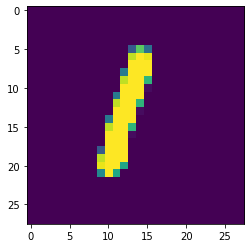

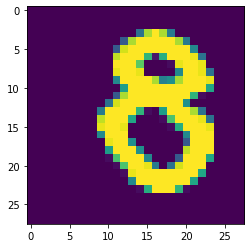

error times: 2


In [39]:
# test with ken data(minst)
predictions_1 = model.predict_classes(ken_data)
# get prediction result
print('prediction:', predictions_1[0:10])
print('actual    :', ken_ans[0:10])
# 顯示錯誤的資料圖像
n = 0
for i in range(0, len(ken_ans)):
    if(predictions_1[i] != ken_ans[i]):
        kd = ken_data[i,:,:]
        plt.imshow(kd.reshape(28,28))
        plt.show()
        n += 1
if(n>0):
    print('error times:', n)

### 初次跑完模型後有一些問題技術一下:

1. 為什麼模型要設成兩層完全連接層(Dense)?
2. activation function、優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics) 要如何選擇?
3. 自己使用小畫家寫的image(0~9), 測試準確率不佳
4. 如果要車牌或一個畫面中有多個數字，要怎麼作?
5. 這個模型是否能用來辨識其他事物，並且具備感知要怎麼作?